# Описание задачи

Есть данные за несколько дней по температуре воздуха. За этот период зафиксированы продажи.

Нужно определить зависимость продаж мороженого от температуры воздуха, и значение этой зависимости.

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Загрузка данных

Источник: https://www.kaggle.com/vinicius150987/ice-cream-revenue

In [2]:
df = pd.read_csv('IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


# Анализ данных

Определим оси:

**X** - температура воздуха, °C

**Y** - уровень продаж, $

In [3]:
X = df.iloc[:, 0]
Y = df.iloc[:, 1]

Для определения зависимости между переменными используем коэффициент Пирсона с помощью функции `corr` библиотеки pandas:

In [4]:
df.corr(method ='pearson')

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


В результате получае таблицу значений, в которой на пересечении строк и столбцов значение коэффициента Пирсона.

Интерпретировать его можно следующим образом:
- с 0.9 по 1 очень сильная корреляция;
- с 0.7 по 0.9 сильная корреляция;
- с 0.5 по 0.7 средняя корреляция;
- с 0.3 по 0.5 слабая корреляция;
- с 0 по 0.3 незначительная корреляция.

Результат показывает, что присутствует сильная зависимость переменных друг от друга.

Показывает это и график:

Text(0, 0.5, 'Sales')

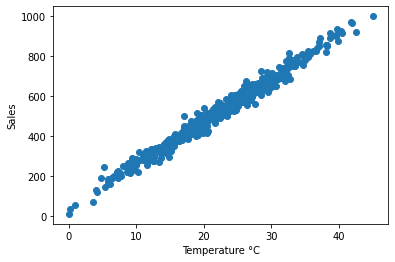

In [5]:
plt.scatter(X, Y)
plt.xlabel("Temperature °C")
plt.ylabel("Sales")

Расположение точек позволяет сделать вывод о линейной зависимости переменных.

Построим график линейной регрессии:

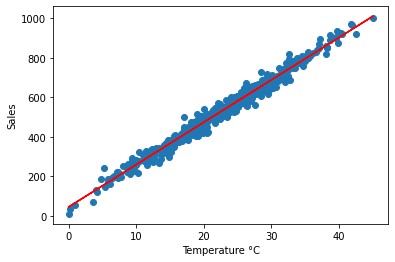

In [6]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Temperature °C")
plt.ylabel("Sales")
plt.show()

# Прогноз

Предположим, у нас есть прогноз погоды на неделю, и нужно предсказать будущие продажи.

В качестве примера сгенерируем прогноз на неделю с температурой от 15 до 44 градусов:

In [7]:
X = np.random.randint(15,45,7)
X

array([15, 35, 27, 29, 41, 24, 28])

и построим прогноз:

In [8]:
Y_pred = linear_regressor.predict(X.reshape(-1, 1)) 
df_res = pd.DataFrame({'temp': X, 'pred_sales': Y_pred.reshape(-1)})
df_res

,temp,pred_sales
0,15,366.485650
1,35,795.358160
2,27,623.809156
3,29,666.696407
4,41,924.019913
5,24,559.478279
6,28,645.252781


На графике это выглядит так:

In [9]:
X = df_res['temp'].tolist()
Y_pred = df_res['pred_sales'].tolist()

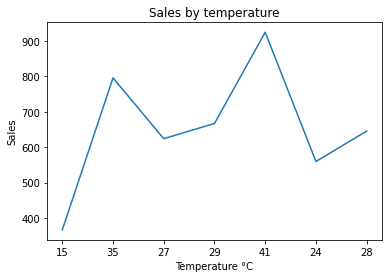

In [10]:
xdata = np.arange(len(X))

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,8)
ax.plot(xdata, Y_pred)

ax.set_ylabel('Sales')
ax.set_xlabel('Temperature °C')
ax.set_title('Sales by temperature')
ax.set_xticks(xdata)
ax.set_xticklabels(X)

plt.show()

Видим, что продажи будут средними (выше 500$ в день), ожидается скачок в 6 день и падение в последний день недели из-за понижения температуры.

# Реальные данные

Рассмотрим реальные данные с сайта https://openweathermap.org/, который позволяет с помощью API получать данные по погоде.

Возьмем город Irpin (`lat = 50.5218, lon = 30.2505`) и данные за 7 дней.

In [11]:
import requests
import os
from dotenv import load_dotenv
from dotenv import dotenv_values

API_KEY = dotenv_values("..\.env")['API_KEY']
lat = 50.5218
lon = 30.2505
URL = 'http://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&lang=ru&exclude=minutely,hourly&appid='+API_KEY
response = requests.get(URL)
print(response)

<Response [200]>


Результат запроса 200, смотрим данные:

In [12]:
r = response.json()
r

{'lat': 50.5218,
 'lon': 30.2505,
 'timezone': 'Europe/Kiev',
 'timezone_offset': 7200,
 'current': {'dt': 1642517173,
  'sunrise': 1642485078,
  'sunset': 1642516017,
  'temp': -2.81,
  'feels_like': -9.81,
  'pressure': 1015,
  'humidity': 56,
  'dew_point': -9.53,
  'uvi': 0,
  'clouds': 75,
  'visibility': 10000,
  'wind_speed': 8.94,
  'wind_deg': 320,
  'wind_gust': 0,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'облачно с прояснениями',
    'icon': '04n'}]},
 'daily': [{'dt': 1642500000,
   'sunrise': 1642485078,
   'sunset': 1642516017,
   'moonrise': 1642516620,
   'moonset': 1642487880,
   'moon_phase': 0.5,
   'temp': {'day': -2.5,
    'min': -4.56,
    'max': -1.04,
    'night': -4.56,
    'eve': -3,
    'morn': -4.13},
   'feels_like': {'day': -9.5, 'night': -11.56, 'eve': -10, 'morn': -11.13},
   'pressure': 1012,
   'humidity': 63,
   'dew_point': -8.71,
   'wind_speed': 10.77,
   'wind_deg': 330,
   'wind_gust': 18.12,
   'weather': [{'id': 600,
 

Отсюда мы можем достать данные о температуре за конкретные дни согласно [документации к API](https://openweathermap.org/api/one-call-api#how):

In [13]:
date = []
X = []
for day in r['daily']:
    date1 = datetime.datetime.utcfromtimestamp(day['dt']).replace(tzinfo=datetime.timezone.utc)
    date.append(date1.strftime("%d.%m.%Y"))
    X.append(day['temp']['day'])
print(date)
print(X)

['18.01.2022', '19.01.2022', '20.01.2022', '21.01.2022', '22.01.2022', '23.01.2022', '24.01.2022', '25.01.2022']
[-2.5, -2.1, 0.16, -1.46, -2.05, -7.62, -8.47, -7.12]


Строим прогноз и график, как в прошлом случае:

In [14]:
Y_pred = linear_regressor.predict(np.array(X).reshape(-1, 1)) 
df_res = pd.DataFrame({'date': date, 'temp': X, 'pred_sales': Y_pred.reshape(-1)})
df_res

,date,temp,pred_sales
0,18.01.2022,-2.50,-8.777797
1,19.01.2022,-2.10,-0.200346
2,20.01.2022,0.16,48.262247
3,21.01.2022,-1.46,13.523574
4,22.01.2022,-2.05,0.871835
5,23.01.2022,-7.62,-118.569159
6,24.01.2022,-8.47,-136.796241
7,25.01.2022,-7.12,-107.847347


В предсказанных значениях появились минусы! Это могло произойти из-за того, что у нас нет примера продаж в холодное время года, и можно предположить, что продажи упадут достаточно сильно.

В график добавим линию нулевых продаж:

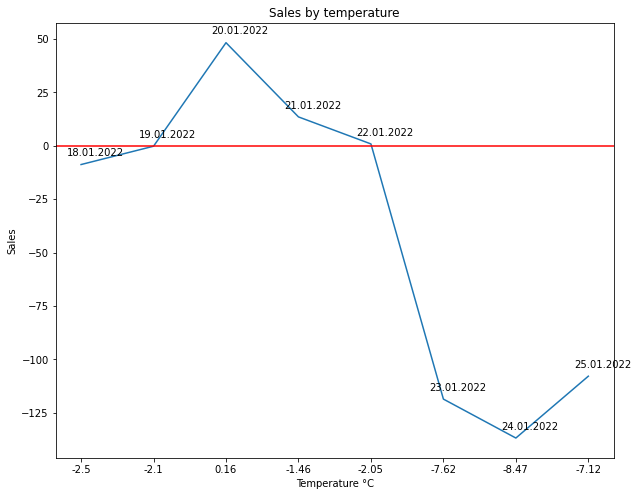

In [15]:
xdata = np.arange(len(X))

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,8)
ax.plot(xdata, Y_pred)
plt.axhline(y=0, color='r', linestyle='-')

# Add labels to the plot
style = dict(size=10, color='000')

for i in range(len(xdata)):
    ax.text(xdata[i]-0.2, Y_pred[i]+4.0, date[i], **style)


ax.set_ylabel('Sales')
ax.set_xlabel('Temperature °C')
ax.set_title('Sales by temperature')
ax.set_xticks(xdata)
ax.set_xticklabels(X)

plt.show()

К графику добавлены значения дат, чтобы наглядно видеть прогноз.